In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/pccomponents'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pccomponents/amd_cpus.csv
/kaggle/input/pccomponents/intel_cpus.csv
/kaggle/input/pccomponents/PcData/PowerSupply.csv
/kaggle/input/pccomponents/PcData/StorageSSD.csv
/kaggle/input/pccomponents/PcData/GPU.csv
/kaggle/input/pccomponents/PcData/RAM.csv
/kaggle/input/pccomponents/PcData/cabinates.csv
/kaggle/input/pccomponents/PcData/CPU.csv
/kaggle/input/pccomponents/PcData/MotherBoard.csv


In [2]:
#other Libs
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin,BaseEstimator
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

# Pc Components Price

Have you in doubt about: "_what pc config could i use_"? or even "_what upgrades should be done in my pc?_".
In this analyst,we will show you an overview about Pc Components.
We will use datasets from each component to view his **prices relations** and use statistics to classifier all them in **filters**.with these filters,you will be able to use the **machine learning model**.
For the end we will create a **machine learning Model** that helps you in select Pc Configs based on your preferences.

### Data View
>Here, we will use Pandas,Matplotlib and Numpy for get a Overview about each component.

In [3]:
#checking data:

cpu_price=pd.read_csv("/kaggle/input/pccomponents/PcData/CPU.csv")
gpu_price=pd.read_csv("/kaggle/input/pccomponents/PcData/GPU.csv")
motherboard_price=pd.read_csv('/kaggle/input/pccomponents/PcData/MotherBoard.csv')
power_supply_price=pd.read_csv('/kaggle/input/pccomponents/PcData/PowerSupply.csv')
ram_price=pd.read_csv('/kaggle/input/pccomponents/PcData/RAM.csv')
storage_price=pd.read_csv('/kaggle/input/pccomponents/PcData/StorageSSD.csv')
cabinat_price=pd.read_csv('/kaggle/input/pccomponents/PcData/cabinates.csv')

amd_class=pd.read_csv('/kaggle/input/pccomponents/amd_cpus.csv')
intel_class=pd.read_csv('/kaggle/input/pccomponents/intel_cpus.csv')


all_components=[cpu_price,gpu_price,motherboard_price,power_supply_price,ram_price,
                storage_price,cabinat_price,amd_class,intel_class]

all_components_names=['cpu_price','gpu_price','motherboard_price','power_supply_price',
                      'ram_price','storage_price','cabinat_price','amd_class','intel_class']

print(all_components)

[      Unnamed: 0                                                CPU      MRP
0              0  amd Ryzen 5 3600 with Wraith Stealth Cooler (1...   ₹9,800
1              1  amd Ryzen 9 5900X 3.7 GHz Upto 4.8 GHz AM4 Soc...  ₹34,890
2              2  processsor Ultra 3.5 GHz LGA 1150 Intel Core i...     ₹760
3              3  GIGASTAR 3.4 GHz LGA 1155 Intel i5-3570K For H...   ₹1,890
4              4  Intel i5-12400F 4.4 GHz Upto 4.4 GHz LGA1700 S...  ₹13,008
...          ...                                                ...      ...
1435        1435  srigs 3.1 GHz LGA 1155 Intel Core i5-2400 (2nd...   ₹1,300
1436        1436  Bestor Dual-Sided Multifunctional Desk Pad ,Wa...     ₹769
1437        1437  Astound VGA to HDMI Converter, converts VGA & ...     ₹999
1438        1438        suryaasys 3.2 GHz LGA 1156 I5 650 Processor     ₹810
1439        1439  Dtech 3.2 GHz FM2+, FM2 AMD A8-5500B AD550BOKA...   ₹2,499

[1440 rows x 3 columns],      Unnamed: 0                                  

#### Checking Integrity:
>Before view real data,we need eliminate wrong data and clean it. 

In [4]:
for x in all_components:
    print(x.describe(),x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1440 non-null   int64 
 1   CPU         1440 non-null   object
 2   MRP         1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB
        Unnamed: 0
count  1440.000000
mean    719.500000
std     415.836506
min       0.000000
25%     359.750000
50%     719.500000
75%    1079.250000
max    1439.000000 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  600 non-null    int64 
 1   GPU         600 non-null    object
 2   MRP         600 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB
       Unnamed: 0
count  600.000000
mean   299.500000
std    173.349358
min      0.000000
25%    149.750000
50% 

## Transform and Handle with Data
>As you seem above,price variable is not a num.so we will also create a transformer for convert it from object to num.
>We will also create a new class for each dataset.this class is **Price Range**,which consists in 5 categories of nums based on price quantile.

In [29]:
#price_transfomer:

class Price_C(BaseEstimator,TransformerMixin):

    def __init__(self,column):
        self.column=column
        
    def fit(self,X,y=None):
        
        return self


    def price_mrp(self,val):
        try:
            
            if isinstance(val,str):
                price=val.replace("₹","").replace(",","").strip()
                if price.isnumeric():

                    #transform in Dolar($)
                    return int(price)*0.01110
            
        except:
            #transform invalid in None
            return None

    
    #def price_class(self):
       
        
                
    def transform(self,X):

        #price Transformer in Int
        x_new=X.copy()
        x_new[self.column]=x_new[self.column].apply(self.price_mrp)

        #class range column 

        quantile25=x_new[self.column].quantile(0.25)
        quantile50=x_new[self.column].quantile(0.50)
        quantile75=x_new[self.column].quantile(0.75)

        quantile_all = x_new[self.column].quantile([0,.25,.5,.75,1.]).unique()

        labels = [f"{10*((i*(2*1.25))+2.5)}%" for i in range(len(quantile_all)-1)]
        
        x_new['price_range']=pd.cut(x_new[self.column],bins=quantile_all,
                                    labels=labels)
        

        return x_new

#Pipeline for Transform data

clean_pipeline=Pipeline([
    ("convert_price",Price_C(column='MRP'))
    #('price class',Price_C)
    ])

#new_clean_data:
all_components2=[]

for x in all_components:
    
    xz=clean_pipeline.fit_transform(x)
    all_components2.append(xz)


### Graphs:
>**Histograms,Boxplots**:Price Distribuition
>**Standard deviation**,**Mean**,**Median**: Price dynamics in this dataset

In [31]:
#Histogram: for view prices distribuition.
from statsmodels.robust.scale import mad
from scipy.stats import median_abs_deviation
def hist(all_components,all_components_names):
    names_idx=0
    for x in all_components:
        
        #x stats:
        x_stats={'mean price':int(x['MRP'].mean())
                 ,'price variance':int(x['MRP'].std()),
                 'median price':int(x['MRP'].median()),
                'IQR':int(x['MRP'].quantile(0.75) - x['MRP'].quantile(0.25)),
                }
        
        plt.figure(figsize=(8,5))

        print(f'MAD {all_components_names[names_idx]} : {median_abs_deviation(x["MRP"])}')
        plt.hist(x['MRP'],color='orange',bins=40,label=x_stats)
        
        plt.axvline(x=x_stats['mean price'],color='red',
                    linestyle='--',linewidth=3,label='Mean price')
        
        plt.xlabel("prices range ($)")
        plt.ylabel("prices range count(n*$)")
        plt.grid(alpha=1,color='orange')
        
        plt.legend()
        plt.title(f'Prices Range {all_components_names[names_idx]}')
        plt.show
        
        names_idx += 1


def hist_class(all_components,all_components_names): #count range_price classes
    names_idx=0

    for x in all_components:
        plt.figure(figsize=(8,4))
        
        sns.catplot(data=x,y=x['MRP'],x=x['price_range'],native_scale=True)
        plt.xlabel("Price range class (quantile)")
        plt.ylabel("Prices per class")
        plt.grid(alpha=0.3,color='orange')

        plt.title(f'Prices Classification {all_components_names[names_idx]}')

        plt.show()
        
        names_idx += 1

def scatter_range_price(all_components,all_components_names):
    names_idx=0
    
    for x in all_components:
        plt.figure(figsize=(8,4))

    
        sns.displot(x,y=x['MRP'],x=x['price_range'],binwidth=(3,.2),cbar=True)
        
        #sns.jointplot(x,y=x['MRP'],x=x['price_range'])
        
        plt.xlabel('Quantile (Price Range)')
        plt.ylabel('Price')

        plt.title(f"Price distribuition {all_components_names[names_idx]}")
        names_idx =+ 1
    
        plt.show()
    
    
#idea: index named as pc config (num)

MAD cpu_price : 37.8843
MAD gpu_price : 206.50440000000003
MAD motherboard_price : 62.4375
MAD power_supply_price : 6.660000000000001
MAD ram_price : nan
MAD storage_price : 12.654
MAD cabinat_price : 3.890550000000001
MAD amd_class : 126.53999999999999
MAD intel_class : 3.5076
None


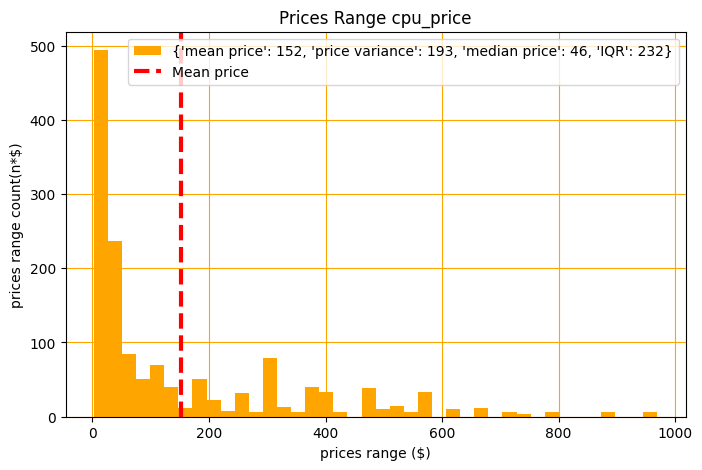

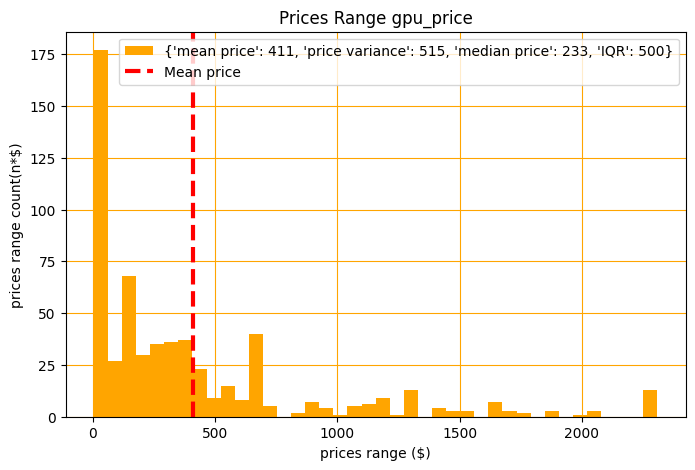

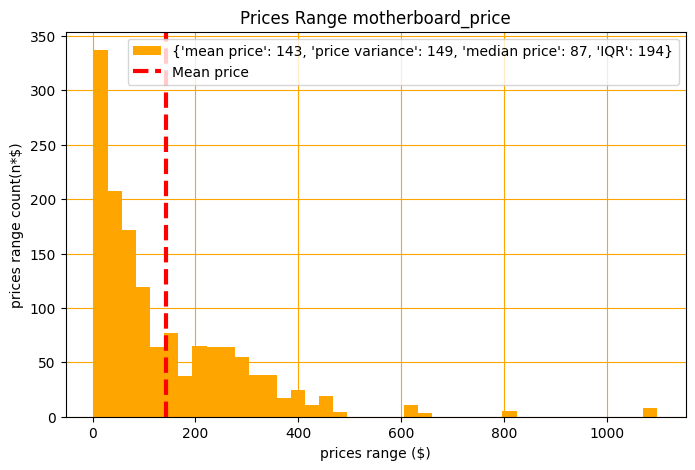

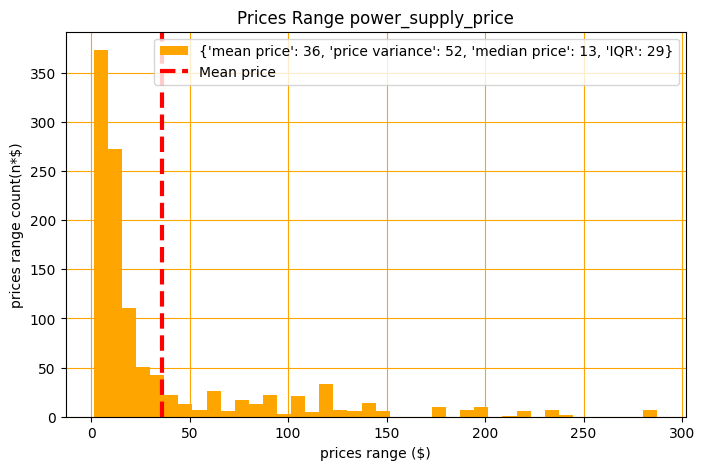

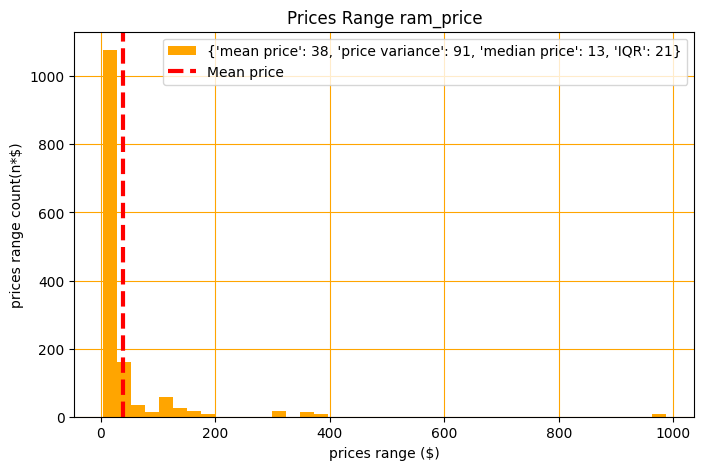

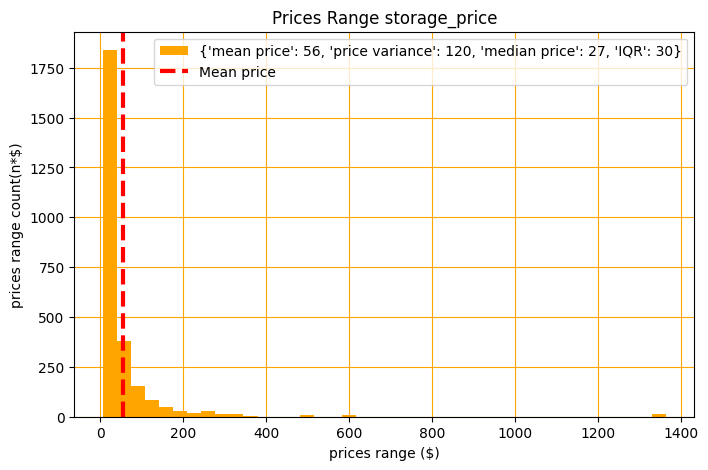

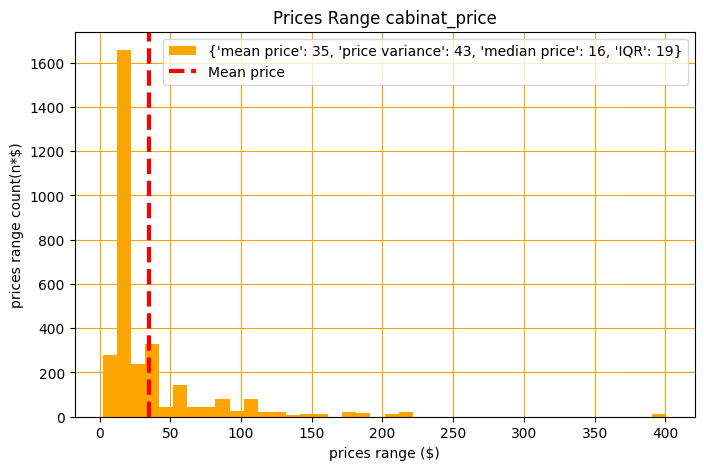

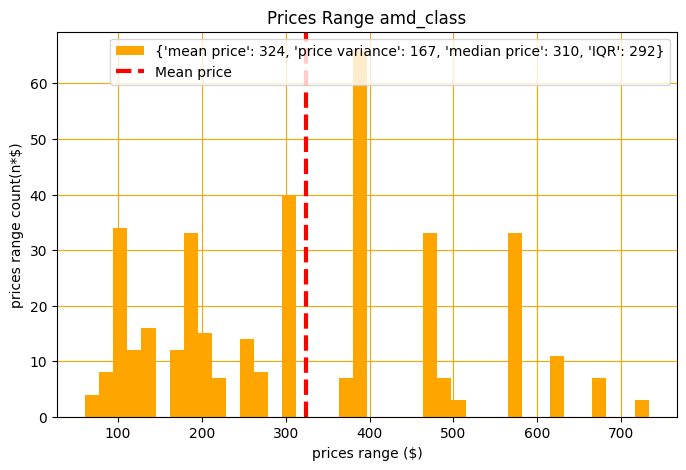

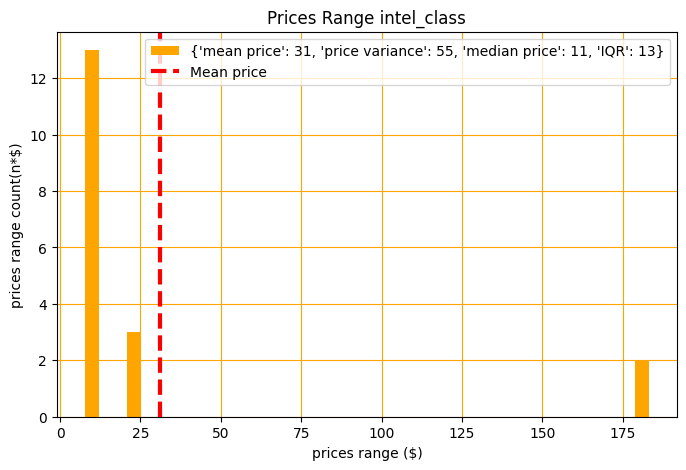

<Figure size 800x400 with 0 Axes>

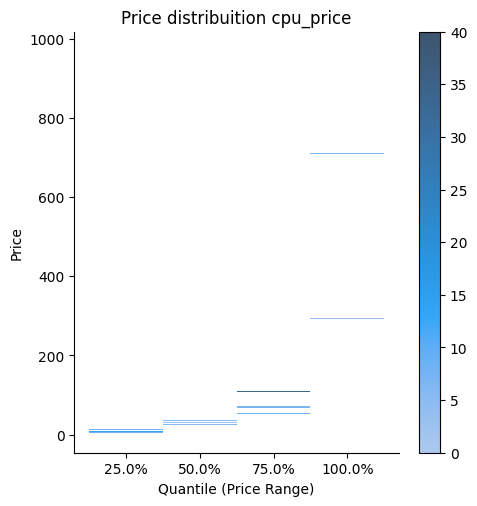

<Figure size 800x400 with 0 Axes>

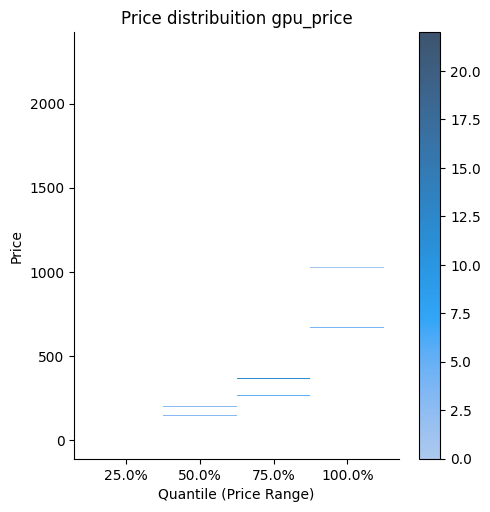

<Figure size 800x400 with 0 Axes>

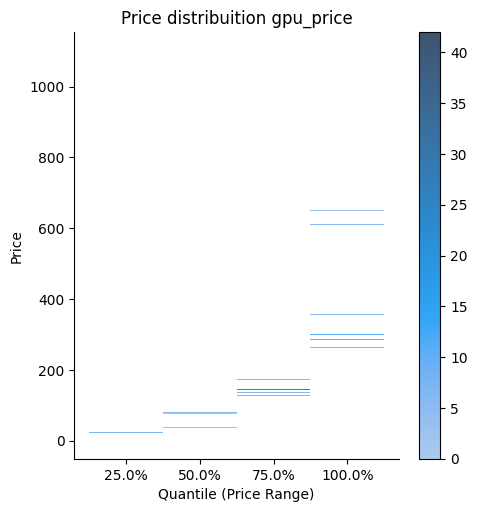

<Figure size 800x400 with 0 Axes>

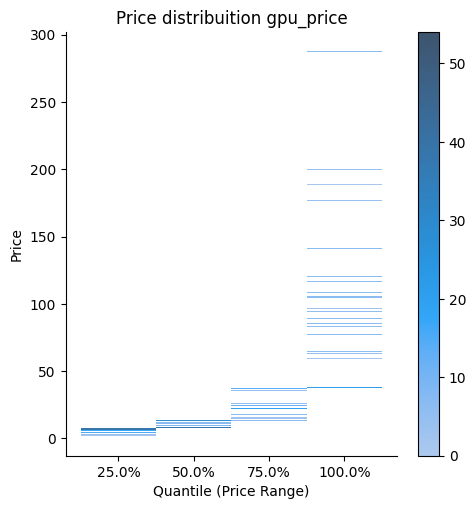

<Figure size 800x400 with 0 Axes>

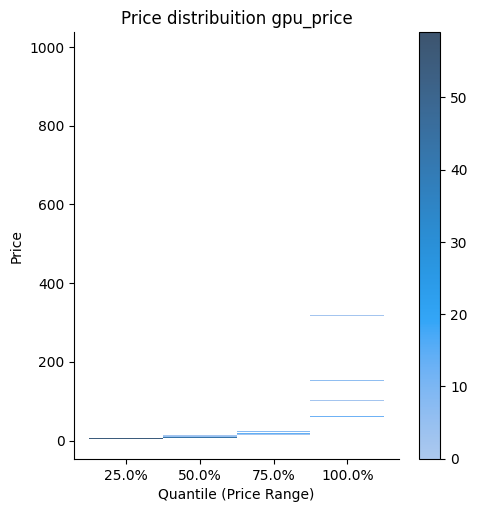

<Figure size 800x400 with 0 Axes>

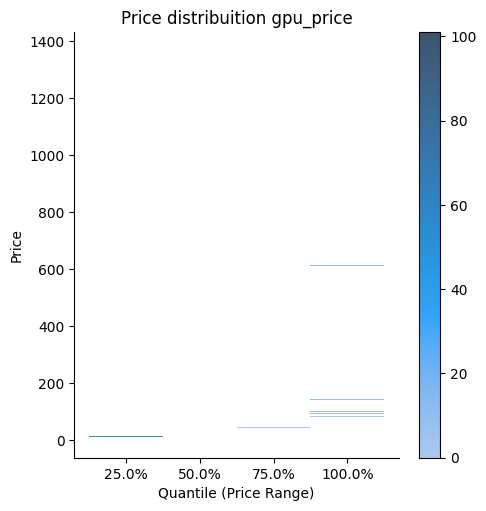

<Figure size 800x400 with 0 Axes>

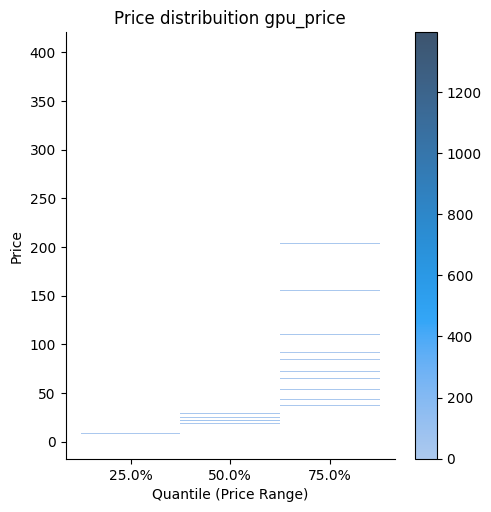

<Figure size 800x400 with 0 Axes>

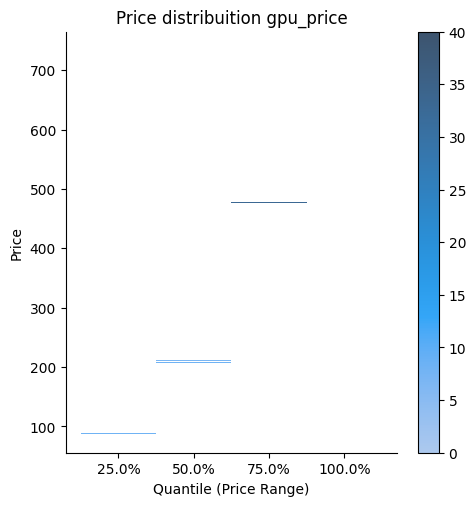

<Figure size 800x400 with 0 Axes>

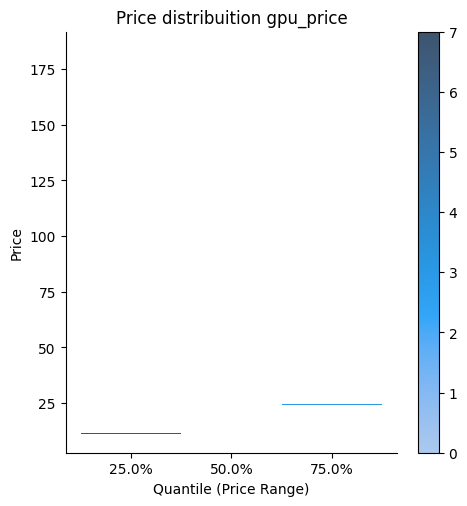

None


<Figure size 800x400 with 0 Axes>

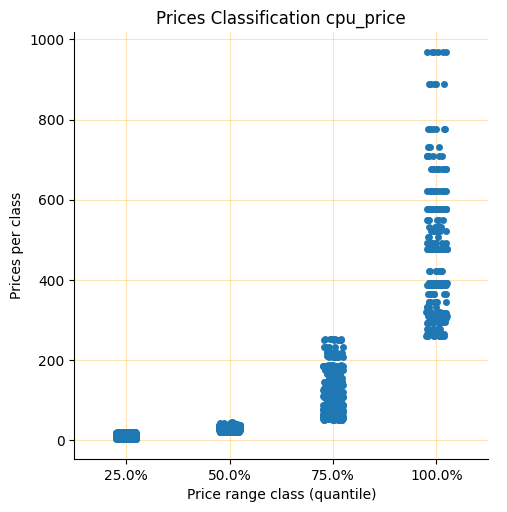

<Figure size 800x400 with 0 Axes>

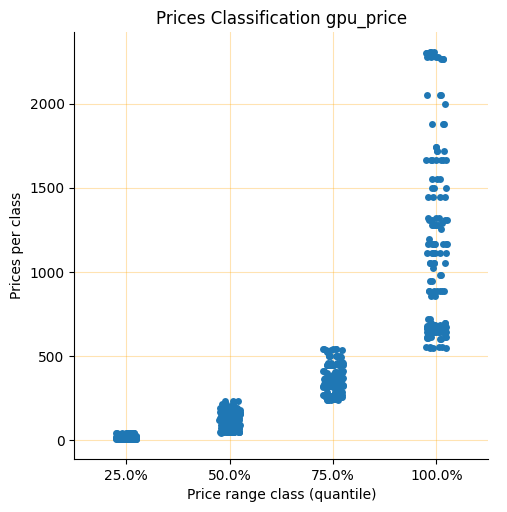

<Figure size 800x400 with 0 Axes>

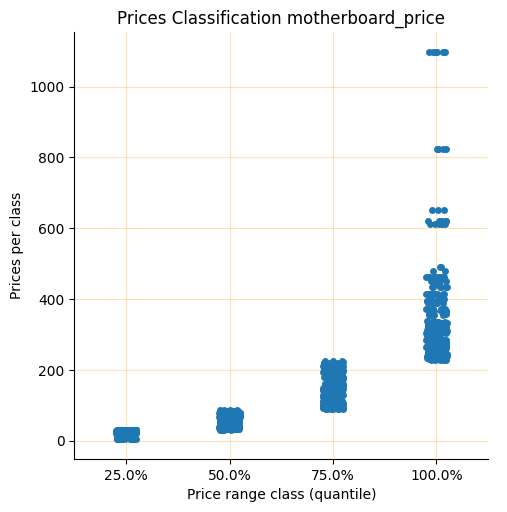

<Figure size 800x400 with 0 Axes>

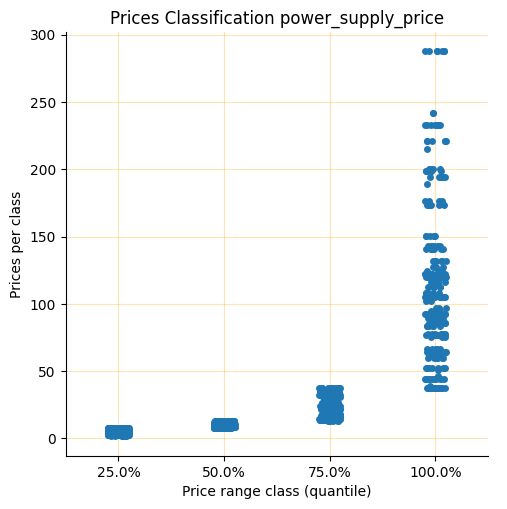

<Figure size 800x400 with 0 Axes>

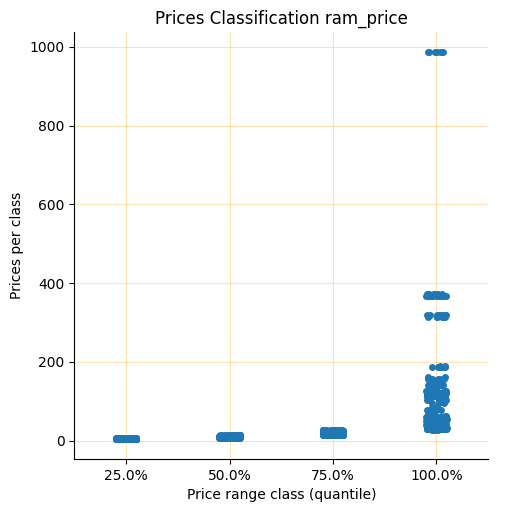

<Figure size 800x400 with 0 Axes>

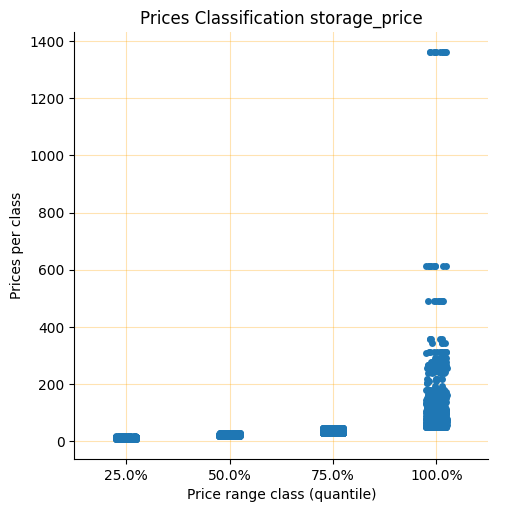

<Figure size 800x400 with 0 Axes>

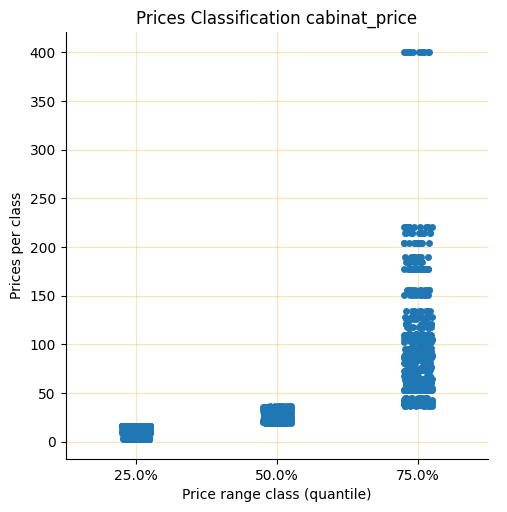

<Figure size 800x400 with 0 Axes>

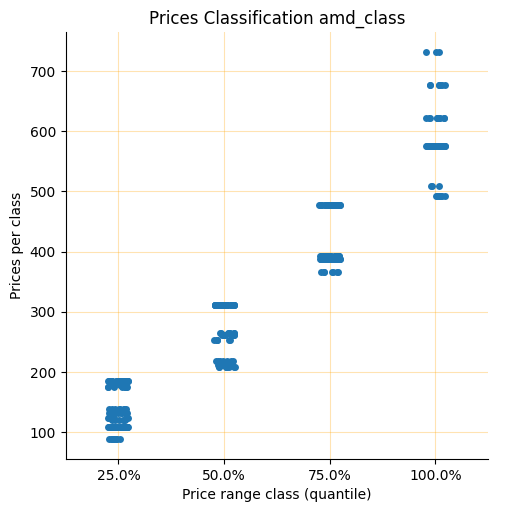

<Figure size 800x400 with 0 Axes>

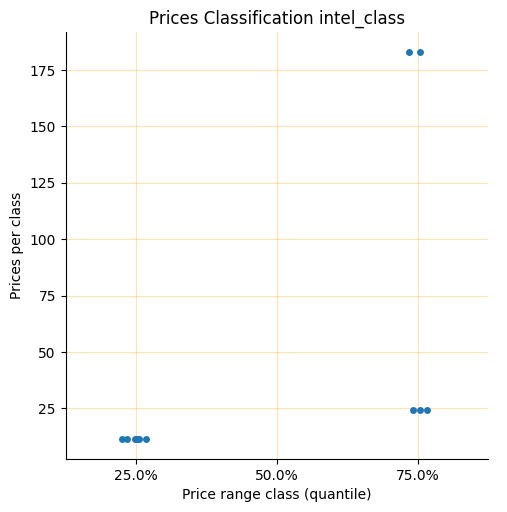

None


In [32]:
print(hist(all_components2,all_components_names))
print(scatter_range_price(all_components2,all_components_names))
print(hist_class(all_components2,all_components_names))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


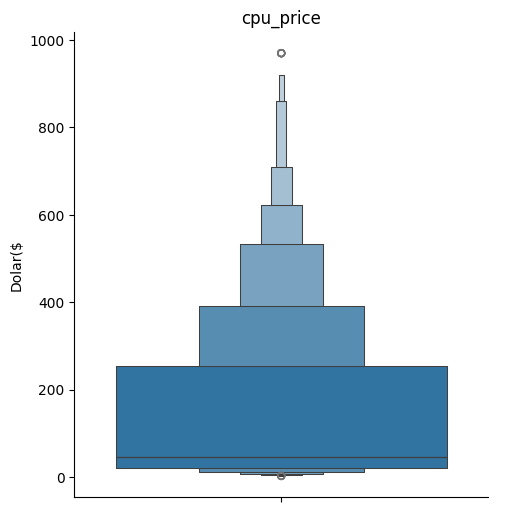

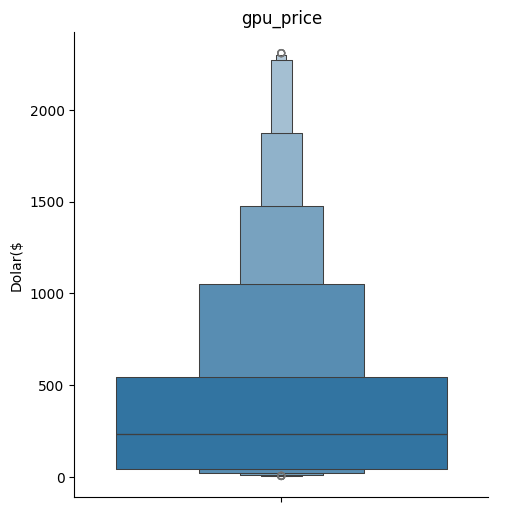

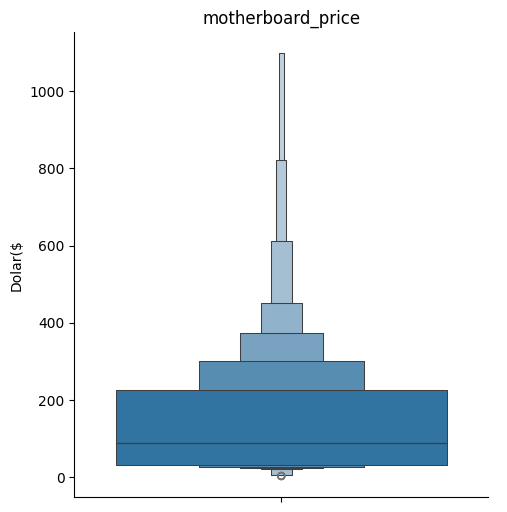

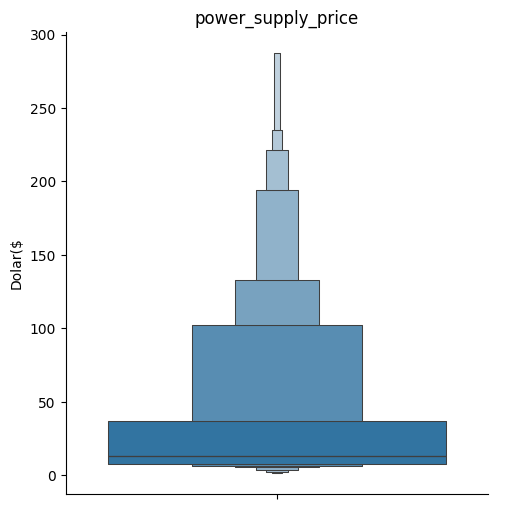

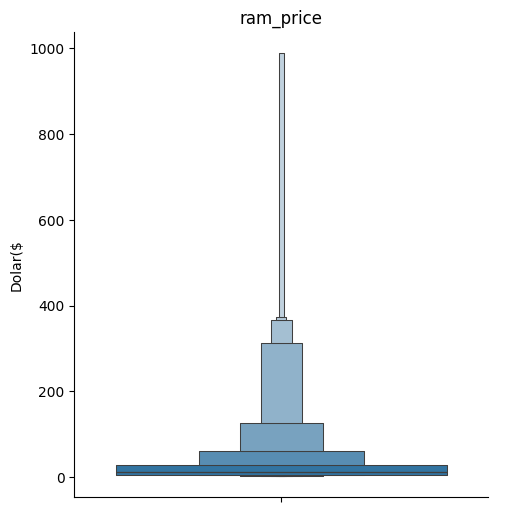

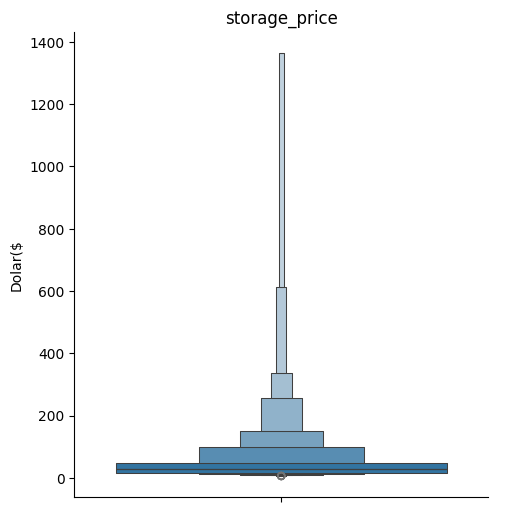

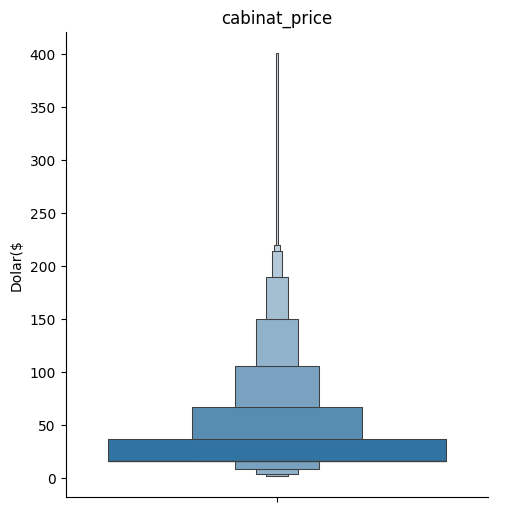

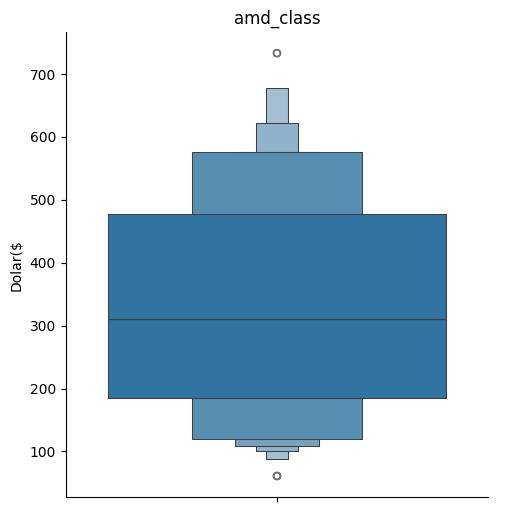

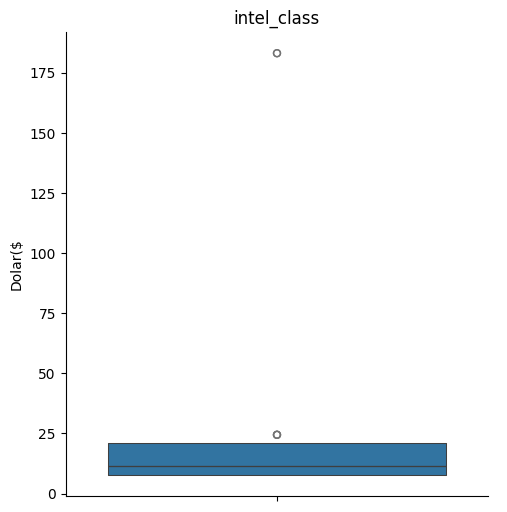

In [33]:
names_idx=0
for o in all_components2:
    sns.catplot(data=o,y='MRP',kind='boxen') #-> double violin with intel-amd
    plt.ylabel('Dolar($')
    plt.title(all_components_names[names_idx])
    names_idx += 1

## Table with prices
>Here you can see how the Min and Max price

In [34]:
#first 5
for x in all_components2:
    
    print("5 Biggest \n \n")
    print(x.sort_values(by='MRP',ascending=True).head(5))

    #lowest val
    print("5 Lowest \n \n")
    print(x.sort_values(by='MRP',ascending=False).head(5))
                                                     

5 Biggest 
 

      Unnamed: 0                                                CPU     MRP  \
1431        1431  TP TROOPS Type C to Lighting OTG Adapter - iOS...  2.3199   
1430        1430    TP TROOPS Micro to USB A 3.0 OTG Gaming Adapter  2.4420   
1393        1393  ERH India 100 GHz AM2 1 Pc Induction Cooling F...  2.5419   
1113        1113  ERH India 100 GHz AM2 1 Pc Induction Cooling F...  2.5419   
1416        1416  RRHR SALES AK-66 Six Finger All-in-One Mobile ...  3.3189   

     price_range  
1431         NaN  
1430       25.0%  
1393       25.0%  
1113       25.0%  
1416       25.0%  
5 Lowest 
 

      Unnamed: 0                                                CPU      MRP  \
505          505  Intel Core i9-10980XE Extreme Edition 3 GHz Up...  969.807   
1225        1225  Intel Core i9-10980XE Extreme Edition 3 GHz Up...  969.807   
345          345  Intel Core i9-10980XE Extreme Edition 3 GHz Up...  969.807   
225          225  Intel Core i9-10980XE Extreme Edition 3 GHz Up

## Price distribuition per Branch
What are the price range in each Cpu Branch?

Text(5.069444444444445, 0.5, 'Dolar($)')

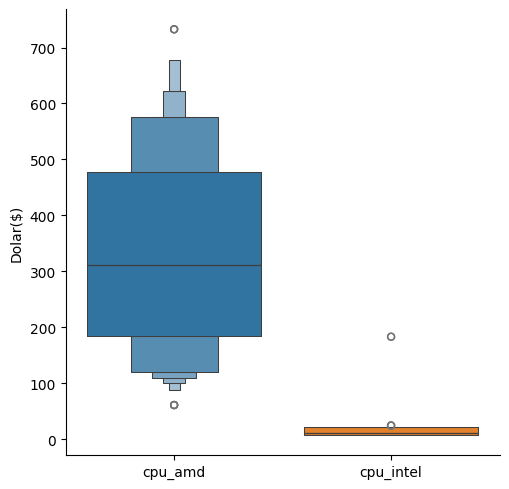

In [36]:
cpu_branch_price=pd.DataFrame({'cpu_amd':all_components2[-2]['MRP'],
                               'cpu_intel':all_components2[-1]['MRP']})

sns.catplot(data=cpu_branch_price,kind='boxen')

plt.ylabel('Dolar($)')

In [28]:
#Scatter with all:


### Random Configs with **Price range** class
>Knowing the general overview of Prices,we will use data to form configs.the focus here is not right config,but the possibility of price range with diferent classes,not all.

## Machine Leaning Model
>Here,we will build a ml model that gives you a price range of you config based on preferences.